# 正态方程

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = 2*np.random.rand(100,1)
y = 4+3*X+np.random.rand(100,1)

In [3]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best

array([[4.57552416],
       [2.9526079 ]])

In [5]:
X_new = np.array([[0],[2]])

In [6]:
X_new_b = np.c_[np.ones((2,1)),X_new]

In [7]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [8]:
y_predict = X_new_b.dot(theta_best)

In [9]:
y_predict

array([[ 4.57552416],
       [10.48073996]])

[0, 2, 0, 15]

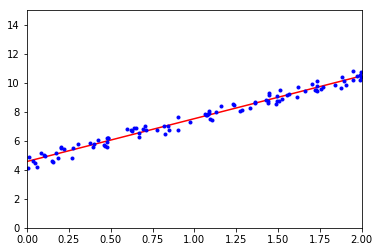

In [10]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lin_reg = LinearRegression()

In [13]:
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
lin_reg.intercept_,lin_reg.coef_

(array([4.57552416]), array([[2.9526079]]))

In [15]:
lin_reg.predict(X_new)

array([[ 4.57552416],
       [10.48073996]])

# 随机梯度下降

In [16]:
eta = .1
n_literation = 1000
m = 100

In [17]:
theta = np.random.rand(2,1)

In [18]:
for iteration in range(n_literation):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients

In [19]:
theta

array([[4.57552416],
       [2.9526079 ]])

In [20]:
from sklearn.linear_model import SGDRegressor

In [21]:
sgd_reg = SGDRegressor(n_iter=50,penalty=None,eta0=.1)
sgd_reg.fit(X,y.ravel())

D:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=50, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [22]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.57366087]), array([2.94764423]))

# 多项式回归

In [23]:
m = 100
X = 6*np.random.rand(m,1)-3
y = .5*X**2+X+2+np.random.randn(m,1)

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
poly_features = PolynomialFeatures(degree=2,include_bias=False)

In [26]:
X_poly = poly_features.fit_transform(X)

In [27]:
X[0]

array([2.8804372])

In [28]:
X_poly[0]

array([2.8804372 , 8.29691845])

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([2.01523824]), array([[1.03846177, 0.50526331]]))

In [30]:
y_predict = lin_reg.predict(X_poly)

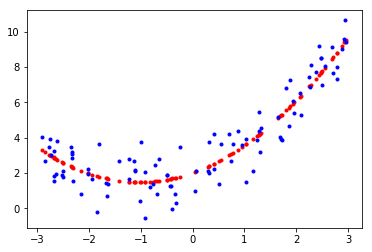

In [31]:
plt.plot(X,y_predict,"r.",linewidth=2, label="Predictions")
plt.plot(X,y,'b.')
# plt.axis([0,2,0,15])

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [40]:
def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = .2)
    train_errors,val_errors = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    
    plt.plot(np.sqrt(train_errors),"r-+",linewidth = 2, label = 'train')
    plt.plot(np.sqrt(val_errors),"b-",linewidth = 3, label = 'val')
    plt.legend(loc = 'upper right',fontsize = 14)
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)

[0, 80, 0, 3]

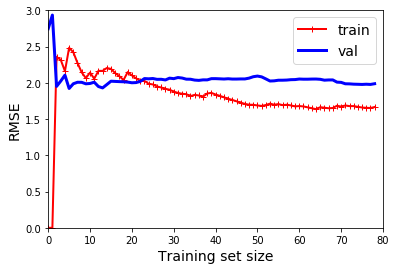

In [41]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)
plt.axis([0,80,0,3])

In [63]:
from sklearn.pipeline import Pipeline

polynominal_regression = Pipeline([
    ("poly_feature",PolynomialFeatures(degree=10,include_bias=False)),
    ("lin_reg",LinearRegression()),
])

[0, 80, 0, 3]

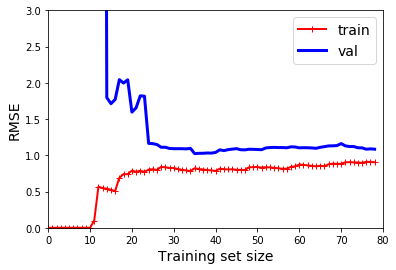

In [69]:
plot_learning_curves(polynominal_regression,X,y)
plt.axis([0,80,0,3])

In [72]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha =1,solver = 'cholesky',random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.29233661]])

In [73]:
sgd_reg = SGDRegressor(max_iter =50,tol=-np.infty,penalty='l2',random_state=42)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([5.3190231])